<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/3.Transfer-functions/Fun%C3%A7%C3%A3o_de_transfer%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>

# Funções de transferência

## Instalando e importando as bibliotecas

In [1]:
! pip install -qq control sympy

In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Criando diretamente uma função de transferência

# Convertendo um espaço de estados em uma função de transferência

In [3]:
from sympy import symbols, Poly, eye

def ABCD_to_tf(A,B,C,D):
    '''  É utilizada para manipulação simbólica e algébrica para converter um espaço
    de estados dado por (A, B, C, D) para uma matriz de funções de  transferência
    no domínio de Laplace.'''
    s = symbols('s')
    G = C*(s*eye(2) - A).inv()*B + D
    return G.as_immutable()

def get_tf(g_exp):
    '''Extrai os coeficiente do numerador e do denominador de uma função de transferência
    simbólica e converte para um função de transferências numérica, a qual pode ser usada
    para extrair propriedades dos sistema.'''
    num, den = g_exp.as_numer_denom()
    num_float = [float(i) for i in Poly(num).all_coeffs()]
    den_float = [float(i) for i in Poly(den).all_coeffs()]
    den_ = den_float[-1]
    return ct.tf(np.array(num_float)/den_,
                 np.array(den_float)/den_)


In [4]:
# modelo linear
A = np.array([[-1.14 , -0.01 ],
              [29.332, -0.947]])
B = np.array([[0.001, 1.   , 0.   ],
              [0.255, 0.   , 2.092]])
C = np.array([[1., 0.],
              [0., 1.]])
D = np.array([[0., 0., 0.],
              [0., 0., 0.]])

sys = ct.ss(A,B,C,D)

sys

<LinearIOSystem:sys[2]:['u[0]', 'u[1]', 'u[2]']->['y[0]', 'y[1]']>

In [5]:
G = ABCD_to_tf(A,B,C,D)
G[0,1].simplify()

(29.332*s + 27.777404)/(29.332*s**2 + 61.215884*s + 40.2699028)

In [6]:
Gp = get_tf(G[0,1])
Gp

TransferFunction(array([0.72838517, 0.68978076]), array([0.72838517, 1.52013985, 1.        ]))

In [7]:
Gp.dcgain()

0.6897807560638066

In [8]:
Gp.poles()

array([-1.0435+0.53292378j, -1.0435-0.53292378j])

In [9]:
Gp.zeros()

array([-0.947+0.j])

In [10]:
wn, zeta, p = ct.damp(Gp)

    Eigenvalue (pole)       Damping     Frequency
    -1.043   +0.5329j        0.8906         1.172
    -1.043   -0.5329j        0.8906         1.172


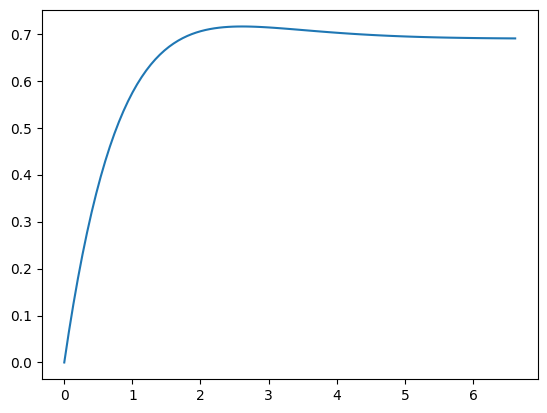

In [11]:
t, y = ct.step_response(Gp)
plt.plot(t,y)